<a href="https://colab.research.google.com/github/asilinob/Talento-Tech/blob/main/Laboratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/Talento Tech/dataset_banco.csv"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_dataset = pd.read_csv(path)

In [5]:
print(df_dataset.shape)
df_dataset.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [6]:
data_rename = df_dataset.rename(columns={
      "age": "Edad",
      "job": "Trabajo",
      "marital": "Estado Civil",
      "education": "Educación",
      "default": "Morosidad",
      "balance": "Saldo",
      "housing": "Vivienda",
      "loan": "Prestamo",
      "contact": "Contacto",
      "day": "Dia",
      "month": "Mes",
      "duration": "Duración",
      "campaign": "Campaña",
      "pdays": "Dias_previos",
      "previous": "Anterior",
      "poutcome": "Resultados",
      "y": "Respuesta"
})

print(data_rename.head())

   Edad       Trabajo Estado Civil  Educación Morosidad   Saldo Vivienda  \
0    58    management      married   tertiary        no  2143.0      yes   
1    44    technician       single  secondary        no    29.0      yes   
2    33  entrepreneur      married  secondary        no     2.0      yes   
3    47   blue-collar      married    unknown        no  1506.0      yes   
4    33       unknown       single    unknown        no     1.0       no   

  Prestamo Contacto  Dia  Mes  Duración  Campaña  Dias_previos  Anterior  \
0       no  unknown    5  may     261.0        1          -1.0         0   
1       no  unknown    5  may     151.0        1          -1.0         0   
2      yes  unknown    5  may      76.0        1          -1.0         0   
3       no  unknown    5  may      92.0        1          -1.0         0   
4       no  unknown    5  may     198.0        1          -1.0         0   

  Resultados Respuesta  
0    unknown        no  
1    unknown        no  
2    unknow

In [7]:
categoricas= data_rename.select_dtypes(include=['object']).columns.tolist()
numericas= data_rename.select_dtypes(include=['int64','float64']).columns.tolist()
print("columnas categoricas", categoricas)
print("columnas numericas", numericas)

columnas categoricas ['Trabajo', 'Estado Civil', 'Educación', 'Morosidad', 'Vivienda', 'Prestamo', 'Contacto', 'Mes', 'Resultados', 'Respuesta']
columnas numericas ['Edad', 'Saldo', 'Dia', 'Duración', 'Campaña', 'Dias_previos', 'Anterior']


In [8]:
pd.value_counts(data_rename['Trabajo'])

Trabajo
blue-collar       9731
management        9455
technician        7599
admin.            5168
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

In [9]:
data_rename.describe()

,Edad,Saldo,Dia,Duración,Campaña,Dias_previos,Anterior
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
data_rename.isna().sum()

Edad            0
Trabajo         2
Estado Civil    1
Educación       1
Morosidad       0
Saldo           2
Vivienda        0
Prestamo        0
Contacto        0
Dia             0
Mes             0
Duración        1
Campaña         0
Dias_previos    1
Anterior        0
Resultados      0
Respuesta       0
dtype: int64

In [11]:
data_rename.dropna(inplace=False)

,Edad,Trabajo,Estado Civil,Educación,Morosidad,Saldo,Vivienda,Prestamo,Contacto,Dia,Mes,Duración,Campaña,Dias_previos,Anterior,Resultados,Respuesta
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


In [12]:
data_rename.describe()

,Edad,Saldo,Dia,Duración,Campaña,Dias_previos,Anterior
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
cols_cat = ['Trabajo', 'Estado Civil', 'Educación', 'Morosidad', 'Vivienda', 'Prestamo', 'Contacto', 'Resultados']

for col in cols_cat:
  print(f"{col}: {data_rename[col].nunique()} subniveles")

Trabajo: 18 subniveles
Estado Civil: 6 subniveles
Educación: 10 subniveles
Morosidad: 2 subniveles
Vivienda: 2 subniveles
Prestamo: 6 subniveles
Contacto: 5 subniveles
Resultados: 6 subniveles


In [14]:
print(data_rename)
data_rename.head(50)

       Edad       Trabajo Estado Civil  Educación Morosidad   Saldo Vivienda  \
0        58    management      married   tertiary        no  2143.0      yes   
1        44    technician       single  secondary        no    29.0      yes   
2        33  entrepreneur      married  secondary        no     2.0      yes   
3        47   blue-collar      married    unknown        no  1506.0      yes   
4        33       unknown       single    unknown        no     1.0       no   
...     ...           ...          ...        ...       ...     ...      ...   
45210    51    technician      married   tertiary        no   825.0       no   
45211    71       retired     divorced    primary        no  1729.0       no   
45212    72       retired      married  secondary        no  5715.0       no   
45213    57   blue-collar      married  secondary        no   668.0       no   
45214    37  entrepreneur      married  secondary        no  2971.0       no   

      Prestamo   Contacto  Dia  Mes  Du

,Edad,Trabajo,Estado Civil,Educación,Morosidad,Saldo,Vivienda,Prestamo,Contacto,Dia,Mes,Duración,Campaña,Dias_previos,Anterior,Resultados,Respuesta
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,no
6,28,Management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,no
7,42,entrepreneur,div.,tertiary,yes,2.0,yes,no,unknown,5,may,380.0,1,-1.0,0,unknown,no
8,58,retired,married,primary,no,121.0,yes,no,unknown,5,may,50.0,1,-1.0,0,unknown,no
9,43,technician,single,secondary,no,593.0,yes,No,unknown,5,may,55.0,1,-1.0,0,unknown,no


In [15]:
desviaciones_estandar = data_rename.select_dtypes(include='number').std()

print(desviaciones_estandar)

Edad              12.036647
Saldo           3924.255525
Dia                8.322473
Duración         257.605175
Campaña            3.097910
Dias_previos     100.120622
Anterior           2.303438
dtype: float64


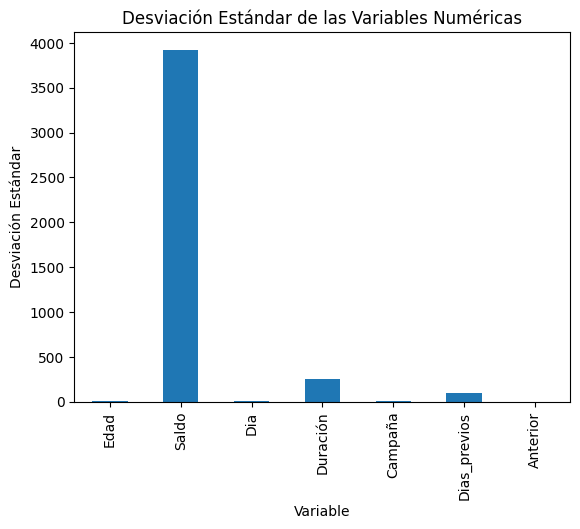

In [16]:
desviaciones_estandar.plot(kind='bar')
plt.title('Desviación Estándar de las Variables Numéricas')
plt.xlabel('Variable')
plt.ylabel('Desviación Estándar')
plt.show()

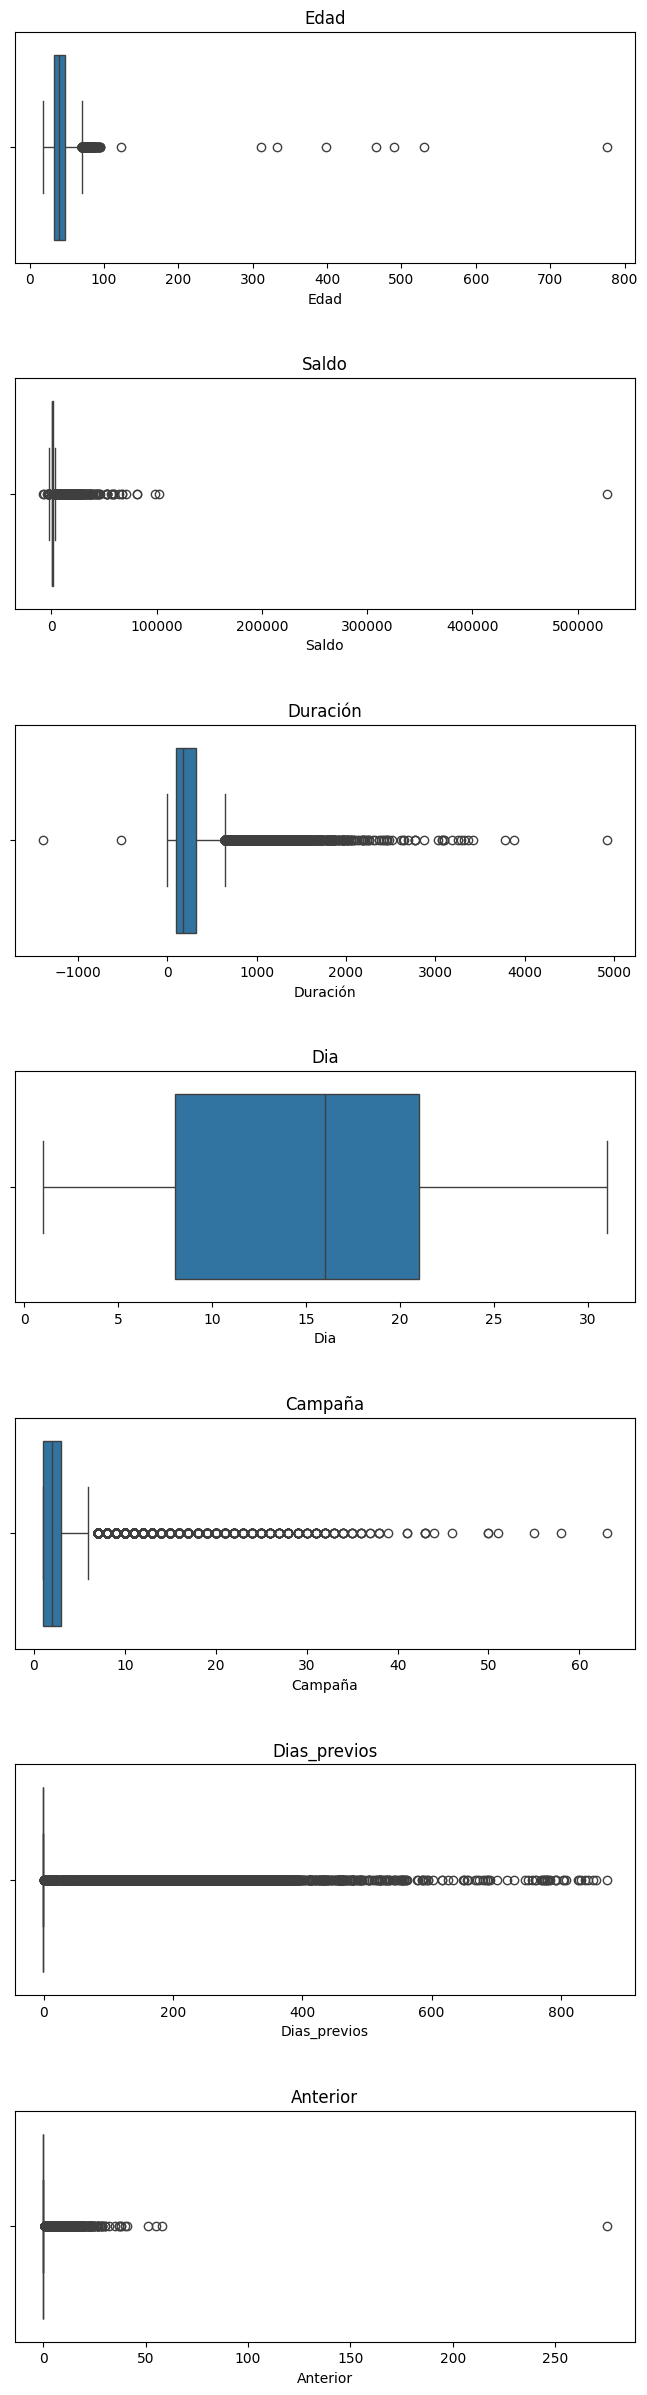

In [27]:
cols_num = ['Edad', 'Saldo', 'Duración', 'Dia', 'Campaña', 'Dias_previos', 'Anterior']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data_rename, ax=ax[i])
  ax[i].set_title(col)

In [29]:
data_rename= data_rename.drop(data_rename[data_rename['Edad'] > 100].index)
print(f"Tamaño del set despues de eliminar registros de edad: {data_rename.shape}")

Tamaño del set despues de eliminar registros de edad: (45207, 17)


In [30]:
data_rename= data_rename.drop(data_rename[data_rename['Duración'] < 0].index)
print(f"Tamaño del set despues de eliminar registros de duración: {data_rename.shape}")

Tamaño del set despues de eliminar registros de duración: (45205, 17)


In [33]:
data_rename= data_rename.drop(data_rename[data_rename['Dias_previos'] > 100].index)
print(f"Tamaño del set despues de eliminar registros previos: {data_rename.shape}")

Tamaño del set despues de eliminar registros previos: (38386, 17)


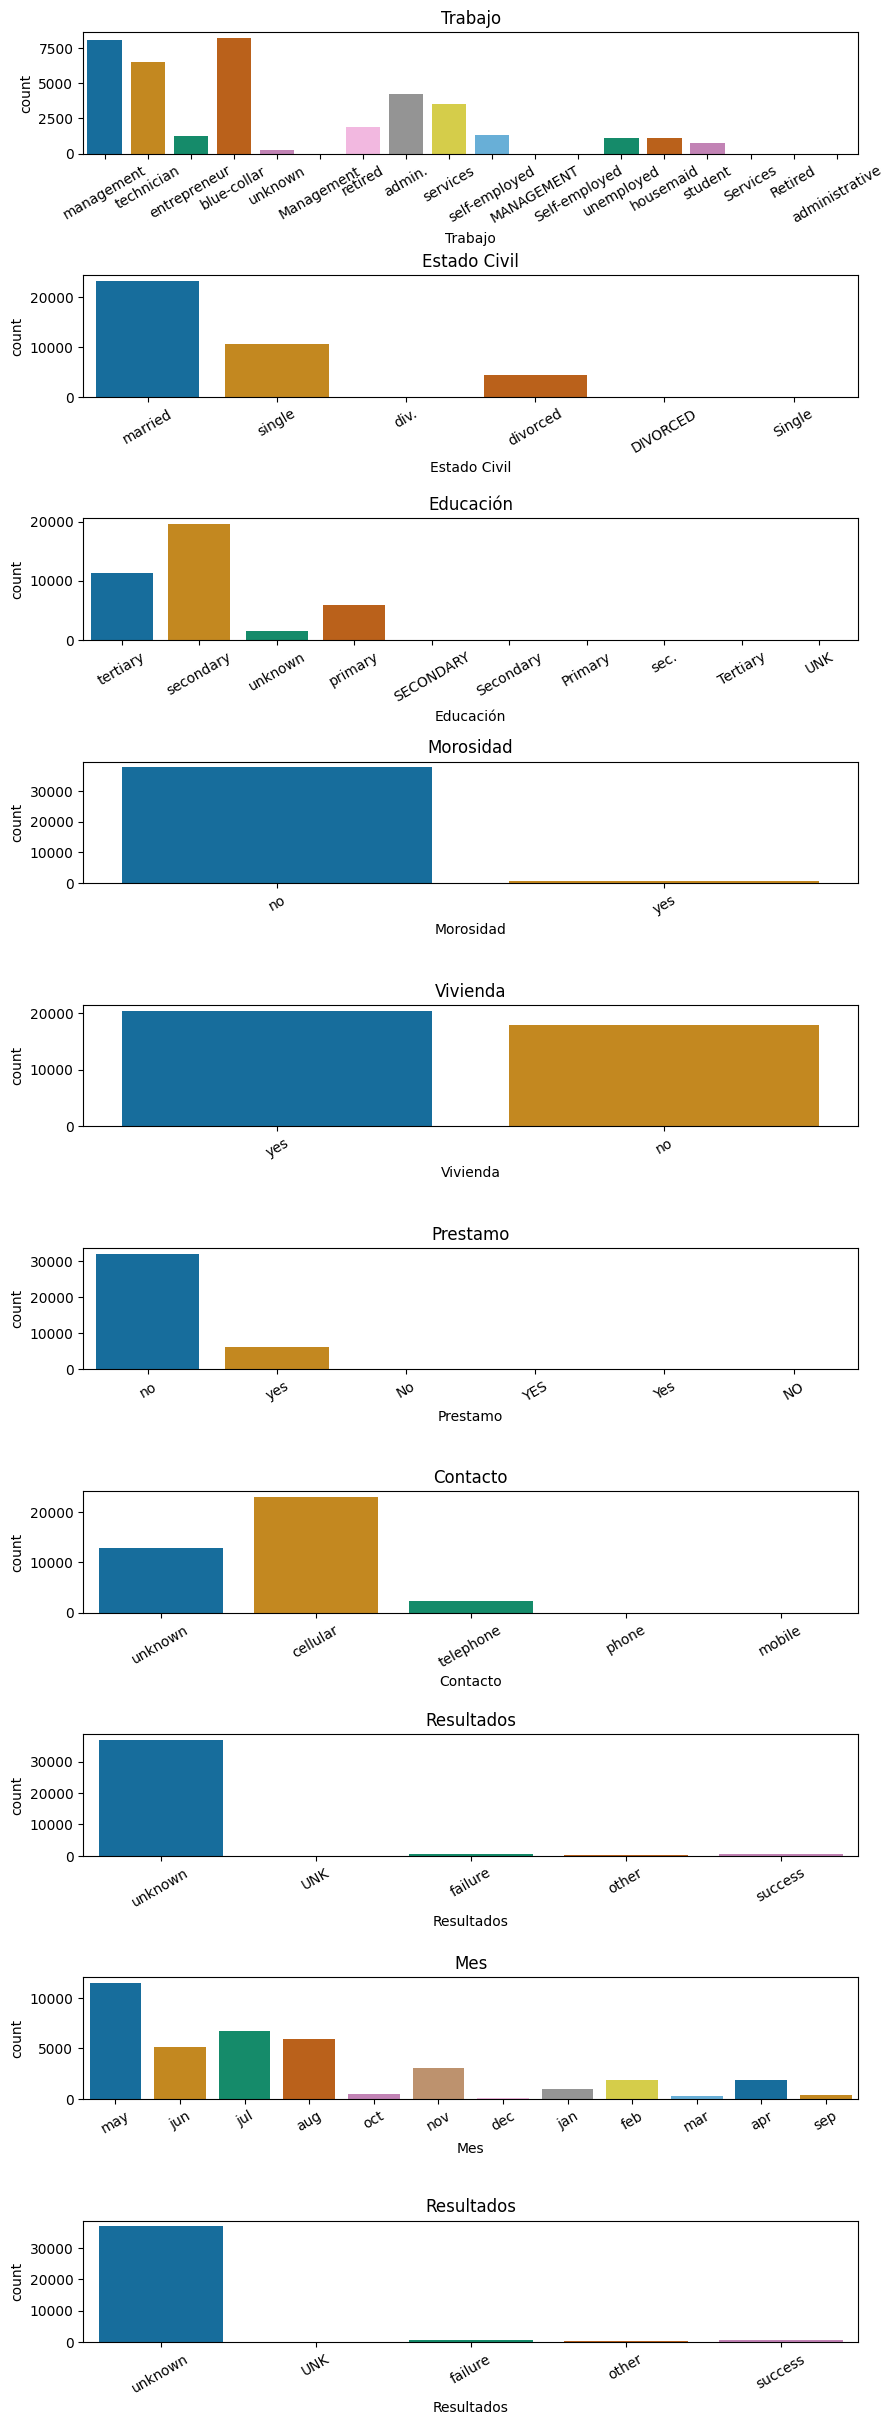

In [34]:
cols_cat= ['Trabajo', 'Estado Civil', 'Educación', 'Morosidad', 'Vivienda', 'Prestamo', 'Contacto', 'Resultados',"Mes","Resultados"]

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10, 30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data_rename, ax=ax[i], palette="colorblind", legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)



In [36]:
print(data_rename['Trabajo'].unique())
data_rename['Trabajo'] = data_rename['Trabajo'].str.replace('admin.', 'Administrador', regex=False)
print(data_rename['Trabajo'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative' nan]
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'Administrador' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student' 'administrative' nan]


In [38]:
print(data_rename["Estado Civil"].unique())
data_rename["Estado Civil"] = data_rename["Estado Civil"].str.replace('divorced', 'Divorciado', regex=False)
print(data_rename["Estado Civil"].unique())

['Divorciado' 'single' 'div.' 'divorced']
['Divorciado' 'single' 'div.']


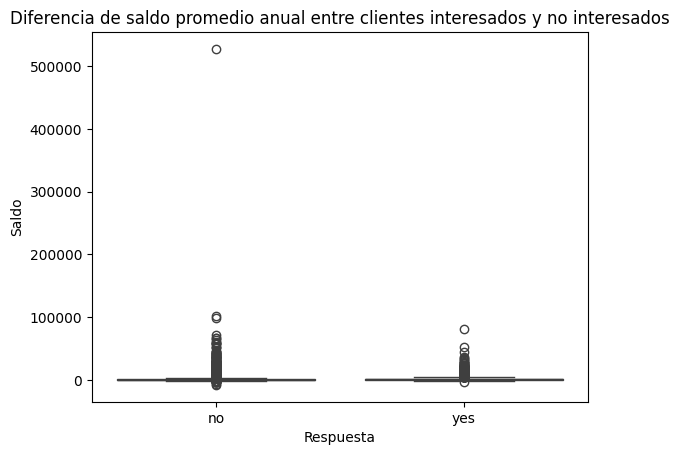

In [40]:
sns.boxplot(x= "Respuesta", y= "Saldo", data=data_rename)
plt.title("Diferencia de saldo promedio anual entre clientes interesados y no interesados")
plt.show()

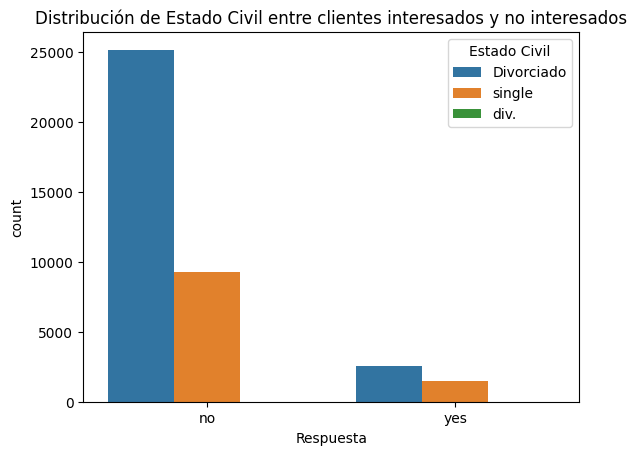

In [41]:
sns.countplot(x="Respuesta", hue="Estado Civil", data=data_rename)
plt.title("Distribución de Estado Civil entre clientes interesados y no interesados")
plt.show()

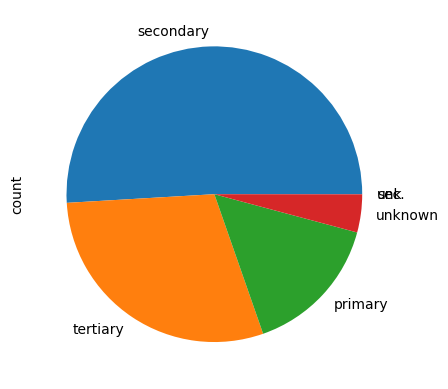

In [46]:
data_rename.Educación.value_counts().plot.pie()
plt.show()

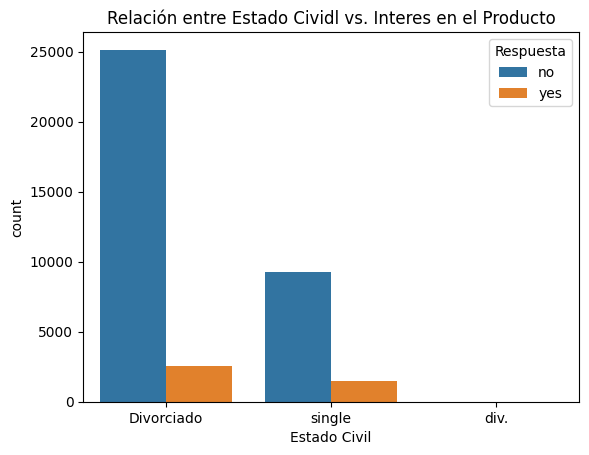

In [47]:
sns.countplot(x="Estado Civil", hue="Respuesta", data=data_rename)
plt.title("Relación entre Estado Cividl vs. Interes en el Producto")
plt.show()

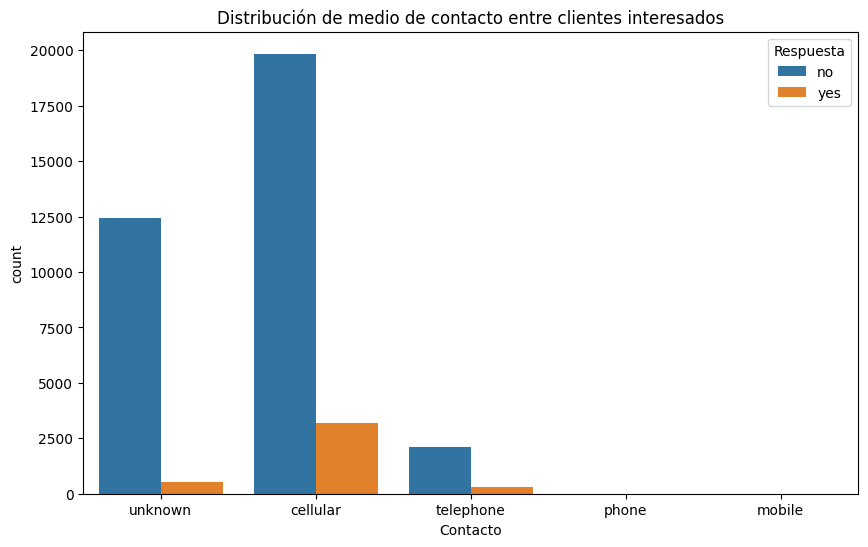

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Contacto", hue="Respuesta", data=data_rename)
plt.title("Distribución de medio de contacto entre clientes interesados")
plt.show()

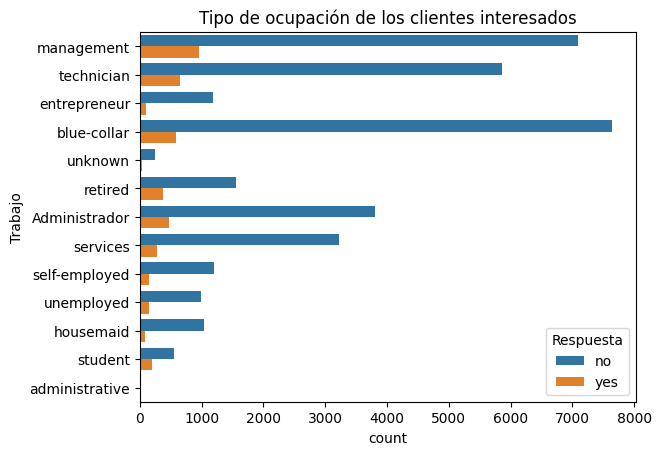

In [49]:
sns.countplot(y="Trabajo", hue="Respuesta", data=data_rename)
plt.title("Tipo de ocupación de los clientes interesados")
plt.show()